
# Hanover Diabetes Education and Engagement Program: Predictions for Prevention and Intervention

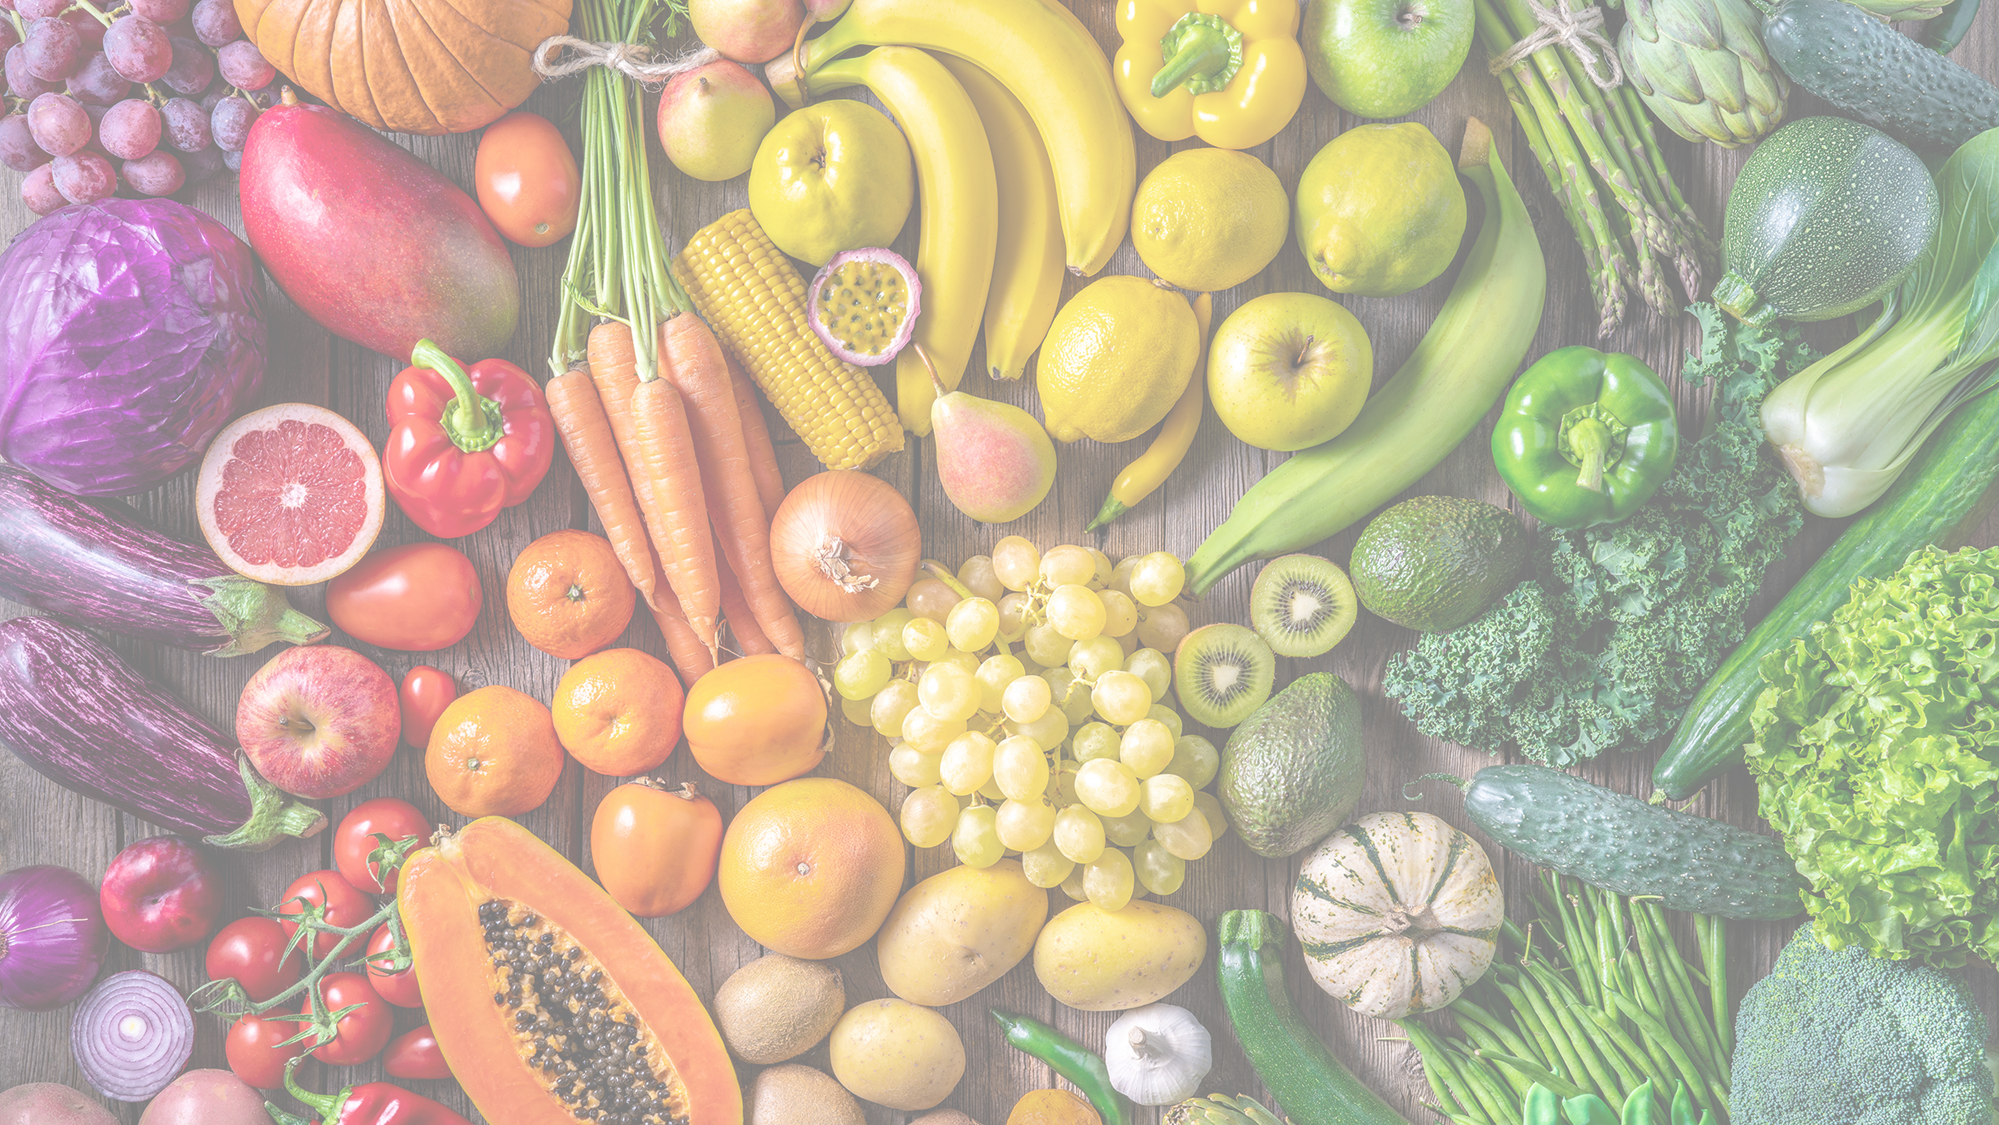!

Final Project Submission


Student name: Deon Durrant

Student pace: self paced

Scheduled project review date/time:

Instructor name: Mark Bardour



# Business and Data Understanding

## Problem Statement
In the United States, 1 in 3 adults are prediabetic, and an alarming 8 out of 10 individuals remain unaware of their condition. Without timely intervention, most prediabetic individuals are at high risk of developing type 2 diabetes, a chronic condition within 5 years. Diabetes is associated with severe health complications and financial burdens. According to the CDC 1 in 4 health care dollars is spent on people with diagnosed diabetes. In 2022 the USA spent $413 billion for diabetic care.  

The town of Hanover is taking a proactive, holistic approach to address this crucial health challenge by implementing a Diabetes Education and Engagement Program (DEEP). The initiative leverages data analysis to highlight the most at-risk patients so that they may be targeted for earlier healthcare intervention slowing the onset and progression of the disease. Additionally, the project seeks to improve early detection, provide targeted interventions, and empower individuals through education and engagement to prevent the progression of diabetes.

## Data Understanding 
The Diabetes Health Indicators Dataset data was sourced from Kaggle and contains healthcare statistics and lifestyle information of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 
- 0 : no diabetes or only during pregnancy.
- 1 : prediabetes.
- 2 : diabetes.

This dataset has 21 feature variables. Features are described clearly with variable explanation available at UC Irvine Machine Learning Repository: CDC Diabetes Health Indicators Dataset.

 
**Classifiers**

The following predictive modeling techniques will be evaluated and compared to determine the most effectitve approach for addressing the problem. 
- Logis c Regression 
- Random Forest 
- XGBoost 

 **Evaluation Metrics**
 
 To assess model performance objectively, the following evaluation metrics will be considered:
* Precision
* Recall
* Accuracy
* F1 score
* AUC Score

# Summary 

A diabetes status classification system was developed using the CDC BRFSS2015 dataset, which contains 253,680 entries across 22 columns. Initial data exploration highlighted a significant class imbalance in the Diabetes_012 variable. To address this imbalance, resampling methods like SMOTE (Synthetic Minority Over-sampling Technique) were applied.
To tackle the problem of risk assessment and prediction of at-risk and diabetic groups, a logistic regression baseline model was built and compared to ensemble models, including Random Forest and XGBoost . Hyperparameter tuning was conducted on the selected XGBoost using ParamGridBuilder to optimize model performance. The final model's precision score improved to 59%, compared to a baseline of 56%.

The SHAP (SHapley Additive exPlanations) framework was employed to enhance the model's interpretability. SHAP fidelity was evaluated by comparing the model's predictions to SHAP predictions across the full dataset and a subset of 100 samples. The mean absolute error for SHAP fidelity was close to 0, demonstrating that the SHAP explanations were highly faithful to the model's predictions. Additionally, SHAP was used to analyze feature importance and explore feature interactions through dependence plots, providing further insights into the relationships between key predictors.



In [1]:
# Import essential libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
import shap
from xgboost import XGBClassifier 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score  
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score  
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## Exploratory Data Analysis

- Examine and sanitize the data
- Handle missing data appropriately
- Investigate data attributes
- Rectify typos, inconsistencies in capitalization, and naming conventions
- Analyze the distribution of variables

In [2]:
# Import and inspect the data
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

df.head(5)

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

## Explore and examine the data 
Examine the data structure.

In [3]:
# Obtain a concise summary of the overall structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
# drop duplictaes
df.drop_duplicates()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[229781 rows x 22 columns]

In [6]:
#Overview of the numerical features of the dataset
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Summary of data structure

* 253680 entries, total 22 columns
* dtype: int64
* No missing data


* **Columns**

    * Diabetes_012*            
    * HighBP                  
    * HighChol                
    * CholCheck               
    * BMI                     
    * Smoker                  
    * Stroke                  
    * HeartDiseaseorAttack    
    * PhysActivity            
    * Fruits                  
    * Veggies                 
    * HvyAlcoholConsump       
    * AnyHealthcare           
    * NoDocbcCost             
    * GenHlth                 
    * MentHlth                
    * PhysHlth                
    * DiffWalk                
    * Sex                     
    * Age                     
    * Education               
    * Income                  


# To ensure a robust response to the business query and deliver practical recommendations:

Prioritize analysis of patient behavior and their impact on disease 

Delve into the data features for predictive patterns that can inform preventataive intervention and disease treatment management .

Use a holistic  approach to establish the correlations between  predictors and onset of diabetes.



# Variables Distribution Analysis

In [7]:
df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

Descriptive Statistics
- Target variable Diabetes_012 has a mean of 29% indicating possible class imbalance
- Health indicators such as HighBP(42%) and HighChol(42%) suggest prevalence of high risk factors
- Lifestyle variables such as Smoker (44%) indicating increase risk for blood glucose condition.  


## Demographic distribution

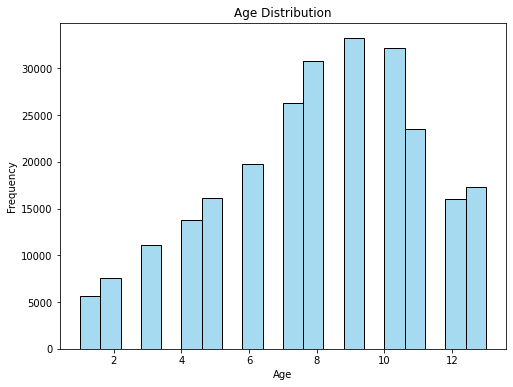

In [8]:
# Demographic distribution 
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'],  bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

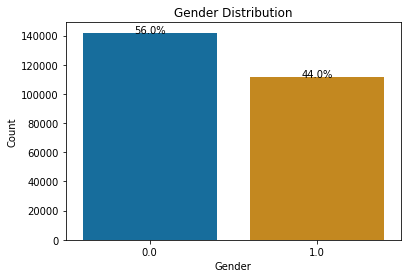

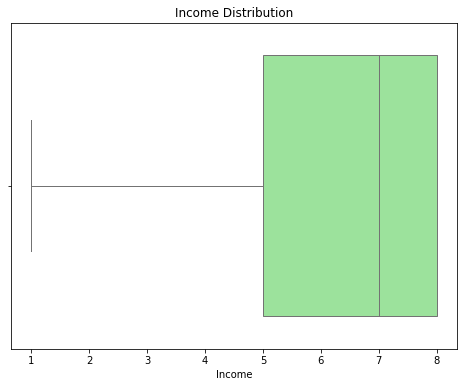

In [9]:
# Gender count 
# Create the plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sex', data=df, hue='Sex', legend=False, palette='colorblind')

# Add percentages above bars
total = len(df)  
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    ax.text(p.get_x() + p.get_width() / 2,  
            p.get_height() + 0.5,          
            percentage,                    
            ha='center',                   
            fontsize=10)                   

# Add title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


# Income distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', data=df, color='lightgreen')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

## Demographic distribution

- Age: Age ranges from 18-80 years with he highest frequency appears around the central bins range 8 - 10, highest peak reflecting a strong concentration of individuals 55-69 years old.

- Gender: There is a  slight gender imbalance in datasets with women outnumbering men 56% to 44%

- Income: The majority of the data (IQR) is concentrated between 6 and 8 on the income scale above $35000 showing that most individuals fall into higher income brackets.


# Health indicators  distribution

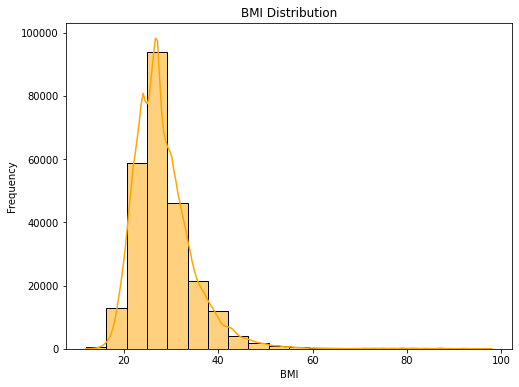

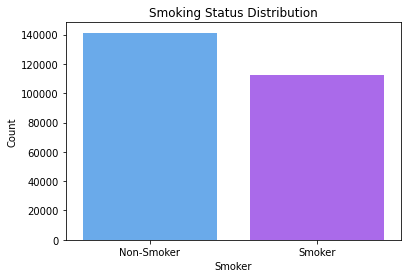

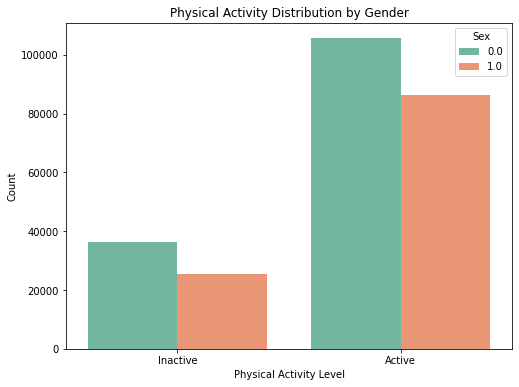

In [10]:
# Visualize health indicators 
# BMI Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, color='orange', bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Smoker Count (Bar plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='Smoker', data=df, palette='cool', hue='Smoker' ,legend=False)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()



# Physical Activity Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='PhysActivity', data=df, hue='Sex', palette='Set2')
plt.title('Physical Activity Distribution by Gender')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Inactive', 'Active'])
plt.show()



## Health indicators distribution
- BMI:The variable's right-skewed nature suggests potential outliers, most BMI falls bewteen 20-40. 
- Smoker:   there are more Non-Smokers than Smokers in the dataset
- Physical Activities: 
    - A majority of individuals are "Active" 
    - females( 0.0)  are more physically active overall

# Diabetes  distribution

In [11]:
# diabetes  distribution Analysis
diabetes=df['Diabetes_012'].value_counts()
diabetes

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [12]:
# Calculate the  blood glucose conditions (prediabetes and diabetes) rates
total_patients = len(df)
blood_glucose_conditions = (df['Diabetes_012'] >= 1).mean()

print(f"Blood glucose conditions: {blood_glucose_conditions}")

Blood glucose conditions: 0.15758830022075054


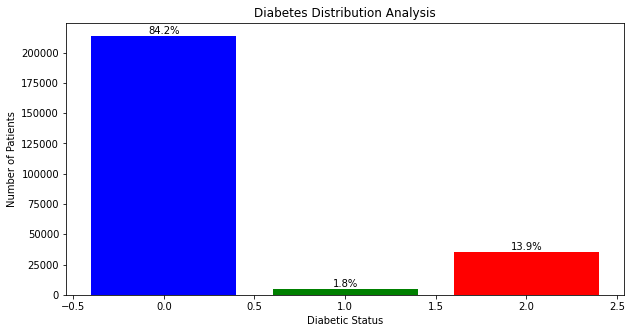

In [13]:
# Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(diabetes.index, diabetes.values, color=['blue', 'red', 'green'])

# Calculate total for percentage calculation
total = sum(diabetes.values)

# Add percentage labels on the bars
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total) * 100  # Calculate percentage
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.1f}%', 
             va='bottom', ha='center')


plt.title('Diabetes Distribution Analysis')
plt.xlabel('Diabetic Status')
plt.ylabel('Number of Patients')
plt.show()


## Diabetes distribution analysis 

The dataset reveals a significant class imbalance in the Diabetes_012 variable:

- **213703 instanced labeled "0"** (non-diabetic)  dominate the data
- **4631 instances labeled as "1"** (pre-diabetes) which is significantly lower
- **35346 instances labeled as "2"** ( diabetes) forms a meaningful part of the data with diabtes rate 0f 13.93% while prediabetes rate is 1.82%  



Health  Implication

- Significant number of patients are actively managing the disease
- There’s an opportunity for preventive measures that could slow or halt progression to diabetes for the at-risk group (prediabetes)
- Mitigation efforts such as education, health care monitoring and lifestyle interventions to reduce the number of patients likely to develop diabetes in the future.



Modeling Implication

- **Class imbalance impact**: Daibetes varaible  imbalance can adversely affetct  the performance of machine learning models
specifically  classifiers which are are sensitive to class distribution.

- **Solution**: Due to the importance of risk assessment and prediction of at-risk and diabetic groups, to address the imbalance issues resampling method such as SMOTE (Synthetic Minority Over-sampling Technique) will be considered.

In [14]:
# Income  level diabetes  distribution

Income = df.groupby(['Income', 'Diabetes_012']).size().unstack(fill_value=0)

# Display the result
Income

Diabetes_012    0.0   1.0   2.0
Income                         
1.0            7114   314  2383
2.0            8341   356  3086
3.0           12005   421  3568
4.0           15622   459  4054
5.0           20792   587  4504
6.0           30431   748  5291
7.0           37219   735  5265
8.0           82179  1011  7195

<Figure size 1440x720 with 0 Axes>

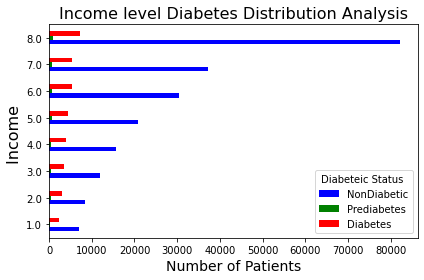

In [15]:
# Create plot
plt.figure(figsize=(20, 10))
Income.plot(kind='barh', color=['blue', 'green','red'], stacked=False) 
plt.title('Income level Diabetes Distribution Analysis', fontsize=16)
plt.xlabel('Number of Patients', fontsize=14)
plt.ylabel('Income ', fontsize=16)
plt.xticks(rotation=0)  
plt.legend(title='Diabeteic Status ', labels=['NonDiabetic', 'Prediabetes', 'Diabetes '])  
plt.tight_layout()

**Income level Diabetes Distribution Analysis**

Higher income groups have a lower proportion of Pre-Diabetics and Diabetics

Text(0, 0.5, 'Income')

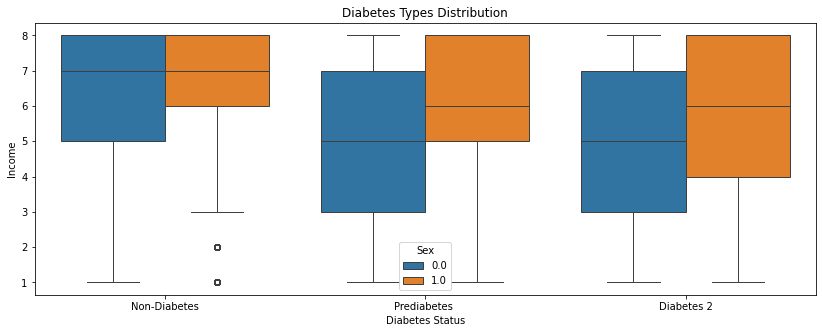

In [16]:
# Boxplot to see which income level has the highest diabetes rates 
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='Diabetes_012',y='Income', hue="Sex")

# Define custom labels
custom_labels = ['Non-Diabetes', 'Prediabetes ', 'Diabetes 2']
plt.xticks(ticks=[0, 1, 2], labels=custom_labels)

# Add title and labels
plt.title('Diabetes Types Distribution')
plt.xlabel('Diabetes Status')
plt.ylabel('Income')

**Income  level diabetes  distribution


In [17]:
Education = df.groupby(['Education', 'Diabetes_012']).size()

# Display the result
Education

Education  Diabetes_012
1.0        0.0               125
           1.0                 2
           2.0                47
2.0        0.0              2699
           1.0               161
           2.0              1183
3.0        0.0              6868
           1.0               314
           2.0              2296
4.0        0.0             50334
           1.0              1350
           2.0             11066
5.0        0.0             58223
           1.0              1333
           2.0             10354
6.0        0.0             95454
           1.0              1471
           2.0             10400
dtype: int64

In [18]:
# Calculate the percentage within each 'Education' group
percentages = Education.groupby(level=0).apply(lambda x: 100 * x / x.sum())
percentages

Education  Education  Diabetes_012
1.0        1.0        0.0             71.839080
                      1.0              1.149425
                      2.0             27.011494
2.0        2.0        0.0             66.757358
                      1.0              3.982191
                      2.0             29.260450
3.0        3.0        0.0             72.462545
                      1.0              3.312935
                      2.0             24.224520
4.0        4.0        0.0             80.213546
                      1.0              2.151394
                      2.0             17.635060
5.0        5.0        0.0             83.282792
                      1.0              1.906737
                      2.0             14.810471
6.0        6.0        0.0             88.939203
                      1.0              1.370603
                      2.0              9.690193
dtype: float64

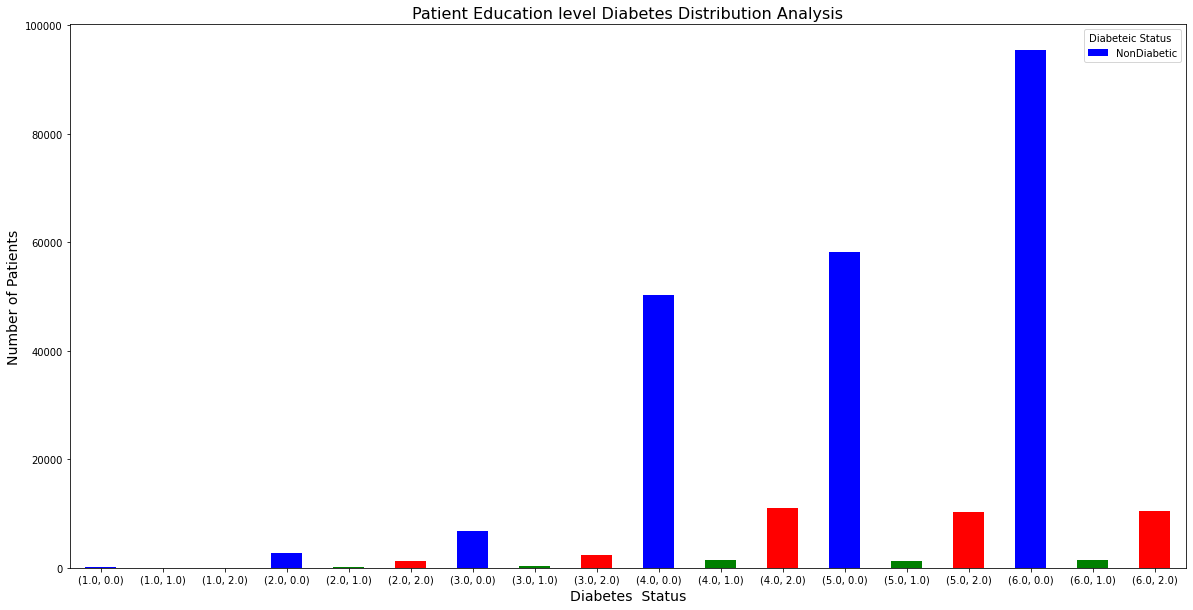

In [19]:
# Create plot
plt.figure(figsize=(20, 10))
Education.plot(kind='bar', color=['blue', 'green','red'], stacked=False)  
plt.title('Patient Education level Diabetes Distribution Analysis', fontsize=16)
plt.xlabel('Diabetes  Status', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=0)  
plt.legend(title='Diabeteic Status ', labels=['NonDiabetic', 'Prediabetes', 'Diabetes '])  
#plt.tight_layout()

### **Patient Education Levels Diabetes Distribution Analysis**

- Non-diabetic patients are the majority across all education levels.
- At education level 1.0, 71.8% are Non-Diabetic, rising to 88.9% at education level 6.0.
- Prediabetes cases are low but consistent across education levels
- The proportion of Diabetics decreases significantly as education increases.
- At education level 1.0, 27.0% are Diabetic, dropping to 9.6% at level 6.0.. 


<function matplotlib.pyplot.show(close=None, block=None)>

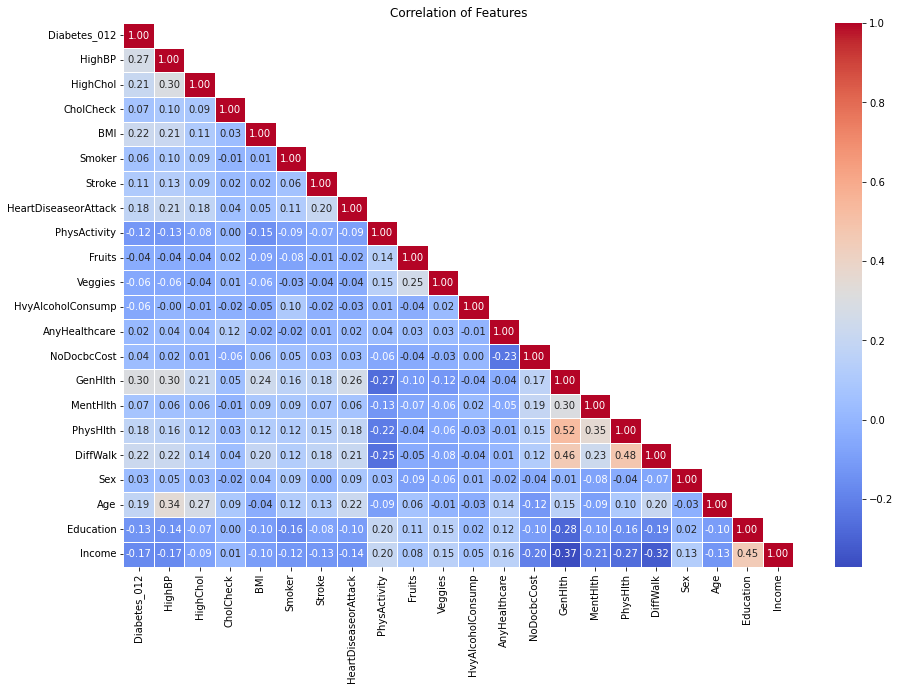

In [20]:
# Features correlation analysis
# Visualize the correlation between variables
corr_matrix =df.corr()
 # Generate a mask to only show the bottom triangle
corr_matrix= corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(bool))
# Plot 
plt.figure(figsize=(15, 10))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,  linewidths=0.5)
plt.title('Correlation of Features')  
plt.show

## **Features Correlation Analysis**

Notable Positive Correlations: highBp & HighCchol, age 

Notable Negative Correlations:genHlth income education

The correlation values for diabetes seems to fall below 0.3 for all features.


In [21]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Preprocessing
 ## Prepare data for modeling
- Feature engineer composite scores
- Create training and testing sets
- Define the predictor and target variables
- Perform a standard train-test split.
- Assign 20% to the test set
- Set random_state ensuring that the split is reproducible

Description: 

- Both Diabetes and Pre-Diabetes are grouped into one category (Diabetes) indicating blood glucose conditions, with Non-Diabetes as the second category.

- Early Detection Focus: This grouping could be useful if the primary goal is to flag anyone at risk of diabetes, including those in the pre-diabetic stage.

- Preventive Action: This approach supports early intervention because it treats both diabetic and pre-diabetic as high-risk groups, prompting similar preventive measures.

**Feature engineer composite scores**

**Healthy eating score**
The healthy eating score provides insights of the dietary behavior of individuals. 


**Lifestyle score = (HvyAlcoholConsump + Smoker + 'PhysActivity )**
The Lifestyle Score  feature will help to capture holistic view of an individual’s lifestyle  and the relationship to the  health outcome. The lower score indicates a healther lifestyle

**Comorbiditity rating= HighBP HighChol	BMI(Obese) HeartDietseaseorAttack Stroke Age**
The Comorbidity Rating will provide a  comprehensive method  to quantify the impact of multiple health conditions on  diabestes risk assesment and prediction . The **lower score** indicates a lower risk of diabetes and prediabetes

**Healthcare Access and Engagement Score**
Healthcare Access and Engagement Score composite variable will provide a broader perspective on an individual’s access to and ability to afford healthcare as well as utilization. Higher score means more access and greater engagement. 

**OverallHealth_Score** 'GenHlth', 'MenHlth''PhysHlth'DiffWalk

Combine four individual health indictors and provide an aggegate of the individuals health. The score provides a comprehensive summary of an individual’s overall health, categorized on a scale of 1 to 4, where **higher scores** indicate **poorer health** and lower scores represent better health.



In [22]:
# Create a healthy eating  Score
df['Healthy_Eating_Score'] = (df['Fruits'] + df['Veggies']) / 2

In [23]:
# Create a Lifestyle Score
df['Lifestyle_score'] = df['HvyAlcoholConsump']+ df['Smoker'] +(1-df['PhysActivity'])


In [24]:
#Check Feature Correlations
correlation_matrix = df[['Lifestyle_score', 'HvyAlcoholConsump', 'Smoker', 'PhysActivity']].corr()
print(correlation_matrix)


                   Lifestyle_score  HvyAlcoholConsump    Smoker  PhysActivity
Lifestyle_score           1.000000           0.374144  0.757451     -0.638006
HvyAlcoholConsump         0.374144           1.000000  0.101619      0.012392
Smoker                    0.757451           0.101619  1.000000     -0.087401
PhysActivity             -0.638006           0.012392 -0.087401      1.000000


Smoker and Lifestyle_score exhibits high collinearity . drop the smoker feature 

In [25]:
# Create health access and engagement score 
df['Health_AccessEngagement_Score']= df['CholCheck'] + (1-df['NoDocbcCost'] )+df['AnyHealthcare']
#Check Feature Correlations
correlation_matrix = df[['Health_AccessEngagement_Score', 'CholCheck', 'NoDocbcCost', 'AnyHealthcare']].corr()
print(correlation_matrix)

                               Health_AccessEngagement_Score  CholCheck  \
Health_AccessEngagement_Score                       1.000000   0.512730   
CholCheck                                           0.512730   1.000000   
NoDocbcCost                                        -0.751750  -0.058255   
AnyHealthcare                                       0.671338   0.117626   

                               NoDocbcCost  AnyHealthcare  
Health_AccessEngagement_Score    -0.751750       0.671338  
CholCheck                        -0.058255       0.117626  
NoDocbcCost                       1.000000      -0.232532  
AnyHealthcare                    -0.232532       1.000000  


In [26]:
 # Create the overall health score
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Normalize the variables
df[['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']] = scaler.fit_transform(
    df[['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']]
)

# Combine into OverallHealth_Score
df['OverallHealth_Score'] = df['GenHlth'] + df['MentHlth'] + df['PhysHlth'] + df['DiffWalk']

#Check Feature Correlations
correlation_matrix = df[['OverallHealth_Score', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']].corr()
print(correlation_matrix)

                     OverallHealth_Score   GenHlth  MentHlth  PhysHlth  \
OverallHealth_Score             1.000000  0.759115  0.591180  0.795696   
GenHlth                         0.759115  1.000000  0.301674  0.524364   
MentHlth                        0.591180  0.301674  1.000000  0.353619   
PhysHlth                        0.795696  0.524364  0.353619  1.000000   
DiffWalk                        0.790999  0.456920  0.233688  0.478417   

                     DiffWalk  
OverallHealth_Score  0.790999  
GenHlth              0.456920  
MentHlth             0.233688  
PhysHlth             0.478417  
DiffWalk             1.000000  


In [27]:
# Comorbidity rating
# Create a new  obese binary column where 0 indicates no obesity  and 1 indicates obesity
df['Obese'] =df['BMI'].apply(lambda x: 1 if x >= 30 else 0)

# Define a lambda function for age-based CCI weights
df['Age_CCI_Weight'] = df['Age'].apply(lambda x: 
    0 if 1 <= x <= 6 else  # Ages below 50
    1 if 7 <= x <= 8 else  # Ages 50 to 59
    2 if 9 <= x <= 10 else  # Ages 60 to 69
    3 if 11 <= x <= 12 else  # Ages 70 to 79
    4 if x >= 13 else        # Ages 80 and above
    0  
)
#Create cormobidity rating  and assign weights to conditions based on CCI (Charlston comorbidity index )
df['Comorbid_rating'] = (
    df['HighBP'] * 1 +
    df['HighChol'] * 1 +
    df['Obese'] * 1 +
    df['HeartDiseaseorAttack'] * 2 +
    df['Stroke'] * 2 + df['Age_CCI_Weight'])


In [28]:
#Check Feature Correlations
correlation_matrix = df[['Comorbid_rating', 'HighBP', 'HighChol', 'Obese','HeartDiseaseorAttack', 'Stroke' ,'Age_CCI_Weight'
]].corr()
print(correlation_matrix)

                      Comorbid_rating    HighBP  HighChol     Obese  \
Comorbid_rating              1.000000  0.615060  0.528205  0.276247   
HighBP                       0.615060  1.000000  0.298199  0.200673   
HighChol                     0.528205  0.298199  1.000000  0.097008   
Obese                        0.276247  0.200673  0.097008  1.000000   
HeartDiseaseorAttack         0.544595  0.209361  0.180765  0.052609   
Stroke                       0.370760  0.129575  0.092620  0.020233   
Age_CCI_Weight               0.787074  0.326276  0.242089 -0.055818   

                      HeartDiseaseorAttack    Stroke  Age_CCI_Weight  
Comorbid_rating                   0.544595  0.370760        0.787074  
HighBP                            0.209361  0.129575        0.326276  
HighChol                          0.180765  0.092620        0.242089  
Obese                             0.052609  0.020233       -0.055818  
HeartDiseaseorAttack              1.000000  0.203002        0.228439  
Strok

In [29]:
# columns to drop 
df.drop(['Age_CCI_Weight', 'Veggies' ,'Fruits', 'Smoker','GenHlth', 'PhysHlth', 'DiffWalk', 'NoDocbcCost', 
         'AnyHealthcare', 'Stroke', 'HvyAlcoholConsump', 'Obese' ,'PhysActivity', 'CholCheck'], axis=1, inplace=True )

### ***Target variable Description***: 

- Both Diabetes and Pre-Diabetes are grouped into one category (Diabetes_status) indicating blood glucose conditions, with Non-Diabetes as the second category.

- Early Detection Focus: This grouping  useful for  flagging  anyone at risk of diabetes, including those in the pre-diabetic stage.

- Preventive Action: This approach supports early intervention because it treats both diabetic and pre-diabetic as high-risk groups, prompting similar preventive measures.

In [30]:
# Convert to binary: Diabetic and Pre-Diabetic(1) (Diabetis_status) and non-diabetic (0)
df['Diabetes_status'] = df['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)
df.drop(['Diabetes_012'], axis=1, inplace=True)

 df.drop(['HighBP', 'HighChol', 'CholCheck',  'Smoker', 'BMI','Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk','Obese'],axis=1, inplace=True)

In [31]:
# Create output and input variable
y= df['Diabetes_status']
X= df.drop(['Diabetes_status' ], axis=1)

In [32]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


# Evaluate class imbalance

In [33]:
# Training set
print('Train:\n')
print(y_train.value_counts())

# Test set
print('Test:\n')
print(y_test.value_counts())

Train:

Diabetes_status
0    170908
1     32036
Name: count, dtype: int64
Test:

Diabetes_status
0    42795
1     7941
Name: count, dtype: int64


**Class Imbalance evaluation

In the training set the proportion non-diabetic to diabetes and prediabetes  is 170908:32036 

In the testing set the proportion of **42795**:**7941**

Smote Technique is used to improve the model's ability to accurately predict the minority class by generating synthetic data points to balance the class distribution. 


In [35]:
# Address class imbalance using SMOTE 
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Previous original class distribution
print(y_train.value_counts())
map
# Fit SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())



Diabetes_status
0    170908
1     32036
Name: count, dtype: int64


Diabetes_status
0    170908
1    170908
Name: count, dtype: int64


**Scaling**
 * Transform the numerical features of the dataset to a similar scale 

In [36]:
# Scale the training set 
# Instantiate MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit scaler to X-train
scaler.fit(X_train)
#Transform scaler 
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),  
    index=X_train.index,
    columns=X_train.columns)  
X_train_scaled.head(5)

HighBP  HighChol       BMI  HeartDiseaseorAttack  MentHlth  Sex  \
31141      0.0       1.0  0.093023                   0.0       0.0  1.0   
98230      0.0       0.0  0.255814                   0.0       0.0  1.0   
89662      1.0       1.0  0.139535                   0.0       0.0  1.0   
208255     0.0       1.0  0.174419                   0.0       0.0  1.0   
233415     0.0       1.0  0.139535                   0.0       0.0  0.0   

             Age  Education    Income  Healthy_Eating_Score  Lifestyle_score  \
31141   0.916667        1.0  1.000000                   1.0         0.333333   
98230   0.583333        0.8  1.000000                   0.5         0.000000   
89662   0.916667        0.8  0.714286                   1.0         0.000000   
208255  0.333333        1.0  0.857143                   1.0         0.000000   
233415  0.916667        0.6  0.714286                   1.0         0.000000   

        Health_AccessEngagement_Score  OverallHealth_Score  Comorbid_rating  
31141                             1.0             0.062500         0.363636  
98230                             1.0             0.125000         0.181818  
89662                             1.0             0.104167         0.454545  
208255                            1.0             0.000000         0.090909  
233415                            1.0             0.375000         0.363636

In [37]:
 #Scale the testing set 
# fit scaler to X-test
scaler.fit(X_test)
#Transform scaler 
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),  
    index=X_test.index,
    columns=X_test.columns)  
X_test_scaled.head(5)

HighBP  HighChol       BMI  HeartDiseaseorAttack  MentHlth  Sex  \
219620     0.0       0.0  0.104651                   0.0       0.1  0.0   
132821     1.0       1.0  0.186047                   0.0       0.0  0.0   
151862     0.0       0.0  0.139535                   0.0       0.0  1.0   
139717     0.0       0.0  0.174419                   0.0       0.1  1.0   
239235     0.0       1.0  0.220930                   0.0       0.9  0.0   

             Age  Education    Income  Healthy_Eating_Score  Lifestyle_score  \
219620  0.500000        0.6  0.142857                   1.0         0.333333   
132821  1.000000        1.0  0.714286                   1.0         0.000000   
151862  0.000000        0.6  0.857143                   1.0         0.000000   
139717  0.083333        0.6  0.857143                   0.5         0.666667   
239235  0.583333        0.4  0.142857                   1.0         0.666667   

        Health_AccessEngagement_Score  OverallHealth_Score  Comorbid_rating  
219620                       1.000000             0.208333         0.090909  
132821                       1.000000             0.125000         0.545455  
151862                       1.000000             0.000000         0.000000  
139717                       1.000000             0.087500         0.000000  
239235                       0.666667             0.887500         0.272727

##   Model Development 1 

- **First Simple Model**: Logistic Regression

- Build and evaluate a baseline model


In [38]:
# Instantiate the model
logreg = LogisticRegression(C=1e12, solver = 'liblinear', fit_intercept=False,random_state=42)

# Fit the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, random_state=42,
                   solver='liblinear')

In [39]:
# Predictions using train and test set
y_hat_train=logreg.predict(X_train_scaled)
y_hat_test= logreg.predict(X_test_scaled)

In [40]:
from sklearn.metrics import classification_report
# Snapshot of comprehensive metrics
print("Classification Report(Training Set):\n", classification_report(y_train, y_hat_train))
print("Classification Report(Testing Set):\n", classification_report(y_test, y_hat_test) )
                                                                    
## Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm = confusion_matrix(y_test,y_hat_test )
print('Confusion Matrix LogR:\n' , cm)

Classification Report(Training Set):
               precision    recall  f1-score   support

           0       0.86      0.97      0.91    170908
           1       0.50      0.16      0.25     32036

    accuracy                           0.84    202944
   macro avg       0.68      0.57      0.58    202944
weighted avg       0.80      0.84      0.81    202944

Classification Report(Testing Set):
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     42795
           1       0.50      0.17      0.25      7941

    accuracy                           0.84     50736
   macro avg       0.68      0.57      0.58     50736
weighted avg       0.81      0.84      0.81     50736

Confusion Matrix LogR:
 [[41444  1351]
 [ 6603  1338]]


In [41]:
# Predict probability scores for the test set
y_score = logreg.decision_function(X_test_scaled)

# False positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# Print AUC
print('Logistic Regression AUC: {}'.format(auc(fpr, tpr)))

Logistic Regression AUC: 0.7863899945354378


# Model Development 2: Random Forest
Random forest ensemble method

In [42]:
# Instantiate and fit a RandomForestClassifier
rf =RandomForestClassifier( criterion='gini', max_depth = 5, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [43]:
# Predict on the sets 
rf_hat_train=rf.predict(X_train_scaled)
rf_preds= rf.predict(X_test_scaled) 


**Evaluate the Random Forest predictive performance**

In [44]:
# Snapshot of comprehensive metrics
print("Training Classification Report")
print(classification_report(y_train, rf_hat_train))

print("\nTest Classification Report")
print(classification_report(y_test, rf_preds))


## Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm_rf= confusion_matrix(rf_preds,y_test )
print('Confusion Matrix RF:\n', cm_rf)

Training Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.92    170908
           1       0.68      0.02      0.04     32036

    accuracy                           0.84    202944
   macro avg       0.76      0.51      0.48    202944
weighted avg       0.82      0.84      0.78    202944


Test Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     42795
           1       0.63      0.02      0.04      7941

    accuracy                           0.84     50736
   macro avg       0.74      0.51      0.48     50736
weighted avg       0.81      0.84      0.78     50736

Confusion Matrix RF:
 [[42697  7771]
 [   98   170]]


In [45]:
# Evalute using the AUC ROC curve
# First calculate the probability scores of each of the datapoints:
y_score = rf.predict_proba(X_test_scaled)
# Check the AUC of predictions
# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,rf_preds)
roc_auc=auc(false_positive_rate, true_positive_rate)
# Print AUC
print('AUC Random Forest: {}'.format(auc(false_positive_rate, true_positive_rate)))

AUC Random Forest: 0.5095589479950563


In [46]:
# Instantiate and fit a  XGBClassifier 
xg = XGBClassifier(random_state=42 ) 
xg.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [47]:
# Predict on  the xg model
xg_train=xg.predict(X_train_scaled)
xg_preds= xg.predict(X_test_scaled)


**Evaluate the XGBoost predictive performance**

In [48]:
# Snapshot of comprehensive metrics
print("Training Classification Report")
print(classification_report(y_train, xg_train))

print("\nTest Classification Report")
print(classification_report(y_test, xg_preds))


## Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
xg_cm= confusion_matrix(xg_preds,y_test )
print('Confusion Matrix XG:\n', xg_cm)

Training Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    170908
           1       0.67      0.23      0.35     32036

    accuracy                           0.86    202944
   macro avg       0.77      0.61      0.63    202944
weighted avg       0.84      0.86      0.83    202944


Test Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42795
           1       0.56      0.20      0.30      7941

    accuracy                           0.85     50736
   macro avg       0.71      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736

Confusion Matrix XG:
 [[41547  6339]
 [ 1248  1602]]


In [49]:
# Evalute using the AUC ROC curve
# First calculate the probability scores of each of the datapoints:
y_score = xg.predict_proba(X_test_scaled)
# Check the AUC of predictions
# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,xg_preds)
roc_auc=auc(false_positive_rate, true_positive_rate)
# Print AUC
print('AUC Random Forest: {}'.format(auc(false_positive_rate, true_positive_rate)))

AUC Random Forest: 0.5862877655411074


# Analysis of models perfomances and final model selection

Model Comparison

.


# Model  Comparison

| Model         | Precision        |Recall  |  F1-Score  | Accuracy | AUC Score|
|-----------------|---------------------|---------|---------|---------|------|
| **Logistic Regression** |  0.50  | 0.17 |  0.25 | 0.84    |      **0.79**    |
| **Random Forest**| **0.62**          |0.02  | 0.04   | 0.84     |     0.51 |
|  **XGBoost**     | 0.56          | **0.20** |**0.30**     |  0.85   |     0.58   | 
| 
         
           

          
- **Precision**: *Random Forest* has the highest precision (0.62), indicating that it has the lowest rate of false positives among the models.(useful when false positives are costly)
- **Recall**: *XGBoost* has the highest recall (0.20), indicating that it has the highest rate of true positives among the models i.e how well the model identifies actual positives (minimizing false negatives).
- **F1 Score**: **XGBoost*   has the highest F1 score (0.30), which balances precision and recall, indicating the overall performance.
- **Accuracy**: XGBoost has largest accuracy (0.85), indicating the overall correctness of the predictions.
- **AUC Score**: *Logistic Regression* has the highest AUC score (0.78), indicating its ability to distinguish between positive and negative classes effectively based on the ROC curve.

 ##  Confusion Matrices Model Performance 

| Model           | True Negatives (TN) | False Positives (FP) | False Negatives (FN) | True Positives (TP) |
|-----------------|---------------------|----------------------|----------------------|---------------------|
| Logistic Regression | 41444           | **1351**                 | 6603               | 1338                |
| Random Forest   |  **42697**            |7771                  | **98**             |170
| XGBoost         | 41584                | 6339               | 1248                |**1602**                  |

 
 




# Model Selection and Tuning 


**XGBoost** was chosen for  several reasons based on an analysis of model performances:

- It achieved a high recall, F1 , and accuracy scores among the models evaluated.
- More balanced trade-off between precision and recall, which is important in minimizing  false negatives and maintaining true positives rates.
- Provides the best overall performance for the diabetes dataset striking a balance across all metrics yet achieving higher accuracy.
*  Easy to evaluate variable importance or feature contributions to model predictions 
* Reduce risk of overfitting, enhancing the model's generalizability

In [50]:
# Xgboost baseline parameters
xg.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [51]:
xg_paramGrid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7,],
    'n_estimators': [ 100,200,300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.5, 1, 5],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1,10,25]   }

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate RandomizedSearchCV with cross-validation
xg_random_search = RandomizedSearchCV(estimator=xg, param_distributions=xg_paramGrid, n_iter=100, cv=3, 
                                      scoring='accuracy', verbose=1, n_jobs=1, random_state=42)


In [53]:
# Fit to the data
xg_random_search.fit(X_train_scaled, y_train)

print(f"Testing Accuracy: {xg_random_search.best_score_ :.2%}")
 #Get the best parameters
print(f"Optimal Parameters: {xg_random_search.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Testing Accuracy: 85.08%
Optimal Parameters: {'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1.0}


In [54]:
# Update the model with optimal parameters 
final_xg = XGBClassifier(subsample=0.6, n_estimators= 100, min_child_weight= 10, scale_pos_weight=1,
                   max_depth= 7, learning_rate= 0.1, gamma= 5, colsample_bytree= 1.0)
final_xg.fit(X_train_scaled, y_train)

# Predict on  the xg model
grid_xg_train=final_xg.predict(X_train_scaled)
grid_xg_preds= final_xg.predict(X_test_scaled)


In [55]:
# Updated XGBoost snapshot of comprehensive metrics
print("Training Classification Report")
print(classification_report(y_train, grid_xg_train))

print("\nTest Classification Report")
print(classification_report(y_test, grid_xg_preds))


## Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm_final_xg= confusion_matrix(grid_xg_preds,y_test )
print('Confusion Matrix Final_XG :\n', cm_final_xg)

Training Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    170908
           1       0.60      0.19      0.29     32036

    accuracy                           0.85    202944
   macro avg       0.73      0.58      0.60    202944
weighted avg       0.82      0.85      0.82    202944


Test Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42795
           1       0.59      0.19      0.29      7941

    accuracy                           0.85     50736
   macro avg       0.73      0.58      0.60     50736
weighted avg       0.82      0.85      0.82     50736

Confusion Matrix Final_XG :
 [[41712  6414]
 [ 1083  1527]]


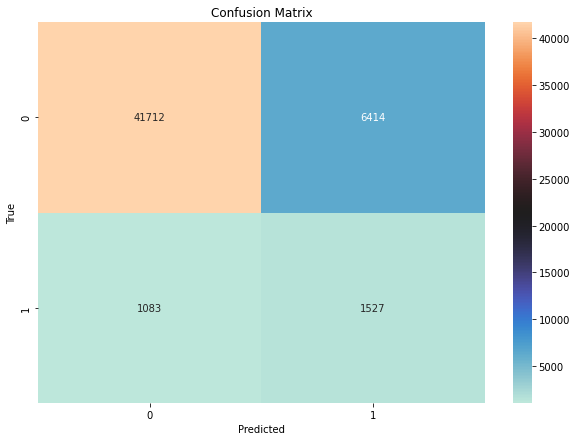

In [56]:
# PlotConfusion Matrix XG :
 
plt.figure(figsize=(10, 7))
sns.heatmap(cm_final_xg, annot=True, fmt='g',cmap='icefire') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC Random Forest: 0.5834932336814713


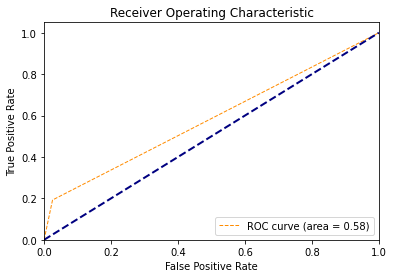

In [57]:
# Evalute using the AUC ROC curve
# calculate the probability scores of each of the datapoints:
y_score = final_xg.predict_proba(X_test_scaled)

# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,grid_xg_preds)
roc_auc=auc(false_positive_rate, true_positive_rate)
# Print AUC
print('AUC Random Forest: {}'.format(auc(false_positive_rate, true_positive_rate)))

# Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=1,linestyle='--' ,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



**Key Metric comparison **

| Metric       | XG   | final_XG    |
|--------------|-------|-------|
| **Precision** | 56% | 59% |
| **Recall**    | 20% | 19% |
| **F1-Score**  | 30% | 29% |
|AUC            |  59  |58   |

**Confusion Matrix Comparison**

|Model   | True Negatives (TN) | False Positives (FP) | False Negatives (FN) | True Positives (TP) |
|---------|----------------------|----------------------|----------------------|----------------------|
| **XG** | 41584          | 6339              |  1248            | 1602           |
| **Final_XG**  | 41712 | 6,414             | 1083              | 1527             |


- True Negatives (TN):Final_XG correctly identifies more non-diabetic cases
- False Positives(FP): Final_XG incorrectly identifies more non-diabetics as blood sugar conditions   (increasing unnecessary interventions) 
- False Negatives(FN):Final_XG has fewer false negatives(1083 vs. 1248) thus better at identifying blood sugar conditions cases. 
- True Positives (TP): XG has a slight decrease in identifing  blood sugar conditions
- Final_XG is slightly better,and has fewer false negatives.

# SHAP (SHapley Additive exPlanations) 

To address the business problem SHAP technique will be used to provide:
- Quantitative measure of feature importance making it easier to 
    - Identify the most influential features for predictions.
    - Detect irrelevant or redundant features.
- Rich visualization providing intuitive plots to interpret model

In [58]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(final_xg)

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test_scaled)


**SHAP Fidelity**
- measures the alignment between the SHAP-based reconstruction of predictions and the actual model predictions
- evaluate the max descrepancy on full data set 
- evalute the max descepancy on subset

In [59]:
explanation = explainer(X_test_scaled)
# calculate SHAP reconstruction
shap_sum = explanation.values.sum(axis=1) + explanation.base_values
# Validate predictions
grid_xg_preds = final_xg.predict(X_test_scaled, output_margin=True)

# Discrepancy
discrepancy = np.abs(shap_sum - grid_xg_preds).max()
print(f"Max discrepancy: {discrepancy}")


Max discrepancy: 4.291534423828125e-06


In [60]:
#Create explainer for the subset
subset_explanation = explainer(X_test_scaled[:100])
# Check additivity 
subset_shap_sum = subset_explanation.values.sum(axis=1) + subset_explanation.base_values
# Validate predictions on the subset
subset_preds = final_xg.predict(X_test_scaled[:100], output_margin=True)
# Discrepancy
discrepancy = np.abs(subset_shap_sum - subset_preds).max()
print(f"Subset Max Discrepancy: {discrepancy}")

Subset Max Discrepancy: 3.814697265625e-06


In [61]:
# predictions on test set
grid_xg_preds = final_xg.predict(X_test_scaled, output_margin=True)
# Mean absolute error
shap_sum = shap_values.sum(axis=1) + explanation.base_values
fidelity_mae = np.mean(np.abs(shap_sum - grid_xg_preds))
print(f"Fidelity (MAE): {fidelity_mae}")

Fidelity (MAE): 5.128279099153588e-07


# Results

| **Dataset**              | **Max Discrepancy**     |
|--------------------------|-------------------------|
| Full Test Set            | .0.0   |
| Subset (100 Samples)     | 0.0      |

### Summary
The observed maximum discrepancies are extremely small, confirming high fidelity. The SHAP values successfully reconstruct the model’s predictions to within floating-point precision limits.

- ** Fidelity Mean Absolute Error (MAE)**
- The Mean Absolute Error (MAE) =0.0.
- High Fidelity: The SHAP explanations are highly faithful to the model's predictions and confirms that the SHAP values correctly explain the contribution of each feature to the prediction.



In [62]:
# Rank Features by Importance

# Calculate mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_test_scaled.columns,
    'MeanAbsSHAP': mean_abs_shap
}).sort_values(by='MeanAbsSHAP', ascending=False)

print(feature_importance)

                          Feature  MeanAbsSHAP
13                Comorbid_rating     0.677681
12            OverallHealth_Score     0.573625
2                             BMI     0.293177
0                          HighBP     0.174372
8                          Income     0.123335
1                        HighChol     0.121427
6                             Age     0.103788
5                             Sex     0.094890
4                        MentHlth     0.080368
7                       Education     0.037154
9            Healthy_Eating_Score     0.028686
10                Lifestyle_score     0.027067
11  Health_AccessEngagement_Score     0.025994
3            HeartDiseaseorAttack     0.015526


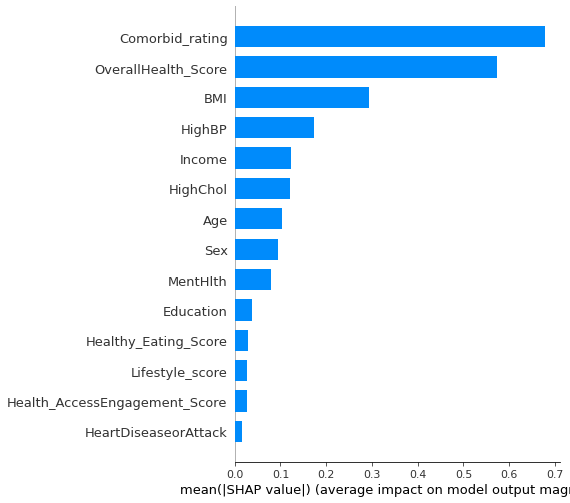

In [63]:
# Display feature importance 
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")


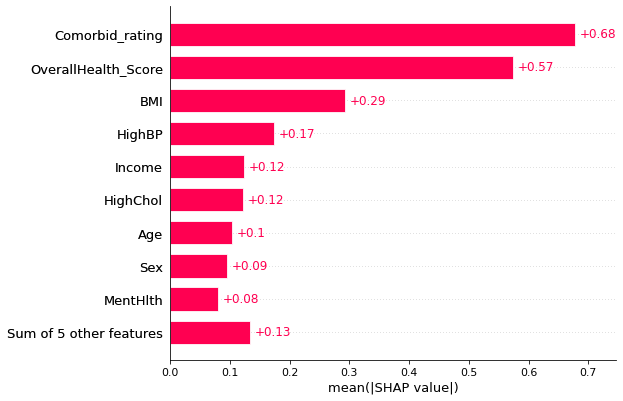

In [64]:
#Create a global plot 
shap_values_array = explainer.shap_values(X_test_scaled)  # Returns SHAP values as NumPy array
shap_values_a = shap.Explanation(shap_values_array, feature_names=X_test_scaled.columns)
shap.plots.bar(shap_values_a)

Beeswarm plot  to display the information-dense summary of how the top features in the  dataset impact the model’s output

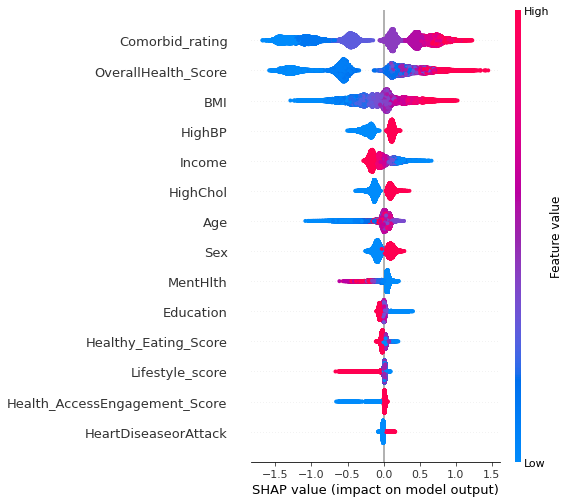

In [65]:
# Display beeswarm plot 
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns)


## Analysis
Feature Importance Order: Comorbid_rating, OverallHealth_Score, and BMI are the top contributors to the model's predictions

Feature Contributions:

The horizontal position (SHAP value) indicates whether the feature increases or decreases the model prediction .
Positive SHAP values push predictions higher risk of diabetes staus, while negative SHAP values push predictions lower . The colors indicate the magnitude of the prediction red indicates a high feature value while blue a low feature value. 

**High importance features**

***Comorbid_rating***:High values (red) tend to increase the prediction (positive SHAP values) while low comorbid_rating (blue) tend to decrease the prediction (negative SHAP values).

**OverallHealth_Score***:High health scores (red) are associated with higher predictions of diabetes status.
Low health scores (blue) reduce predictions.

**BMI**: High BMI (red) generally increases predictions, while low BMI (blue) reduces predictions.

**Moderate importance Features**
HighBP and Income has mixed SHAP distributions showing that these features have variable effects on predictions depending on their values. For example at lower incomes (red)increases predictions.

**Lower Importance Features**:
Lifestyle_score, Health_AccessEngagement_Score, and HeartDiseaseorAttack have smaller average SHAP values, indicating less overall contribution to the model predictions.


## Examine Feature Interactions

Feature Interaction: Use SHAP dependence plots to explore interactions between **high importance** features 

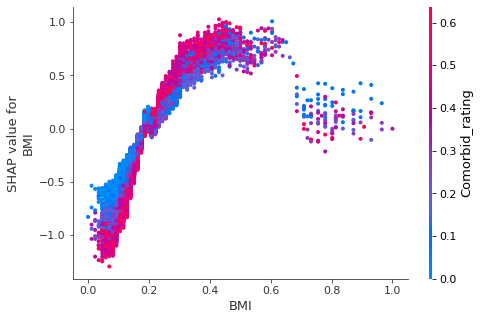

In [66]:
# BMI dependence plot
shap.dependence_plot('BMI', shap_values, X_test_scaled, display_features=X_test_scaled)

**BMI**
- There is  a non-linear and feature-interactive relationship between BMI and the model's predictions. 
-  BMI has a positive contribution up to a certain threshold but declines thereafter

Feature Interaction 

-  BMI interacts with the comorbid feature to influence predictions. 
    - High BMI combined with high glucose levels (pink) may contribute negatively to the outcome (e.g., risk of diabetes).
    - Low BMI combined with low glucose levels (blue) may contribute positively to a favorable outcome.
- The interaction between BMI and the comorbid feature appears non-linear, with significant effects in the extremes of both features.

BMI may not always serve as a protection feature and can be overridden by high cormorbid elements.

In [67]:
# Assess redundancy
correlation_matrix = X_train_scaled[["BMI", "Comorbid_rating"]].corr()
print(correlation_matrix)

                      BMI  Comorbid_rating
BMI              1.000000         0.218869
Comorbid_rating  0.218869         1.000000


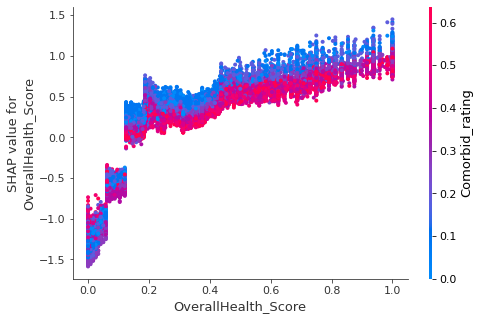

In [68]:
# OverallHealth_Score dependence plot 
shap.dependence_plot('OverallHealth_Score', shap_values, X_test_scaled, display_features=X_test_scaled)

**OverallHealth_Score**

- Increasing OverallHealth_Score (positive SHAP values),  pushes the model’s predictions toward diabetic status (or higher risk).

- Low OverallHealth_Score Indicates better health conditions(lower scores negative SHAP values)  pushes predictions toward non-diabetes (or lower risk).

Feature Interactions:
- non-linear relationship  with the effect of poor health intensifying at higher scores.
- High comorbid feature values (pink) amplify risk at poorer health levels, while low comorbid feature values (blue) mitigate it
- The color gradient  suggest that the impact of poor health is influenced  by additional health or demographic factors.
- Taliored intervention strategies for individuals with poor overall health but low levels of a specific comorbid condition (blue points) 

In [69]:
# Assess redundancy
correlation_matrix = X_test_scaled[["OverallHealth_Score", "Comorbid_rating"]].corr()
print(correlation_matrix)

                     OverallHealth_Score  Comorbid_rating
OverallHealth_Score             1.000000         0.322584
Comorbid_rating                 0.322584         1.000000


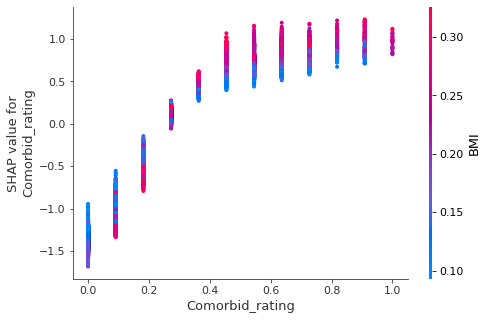

In [70]:
# Comorbid_rating dependence plot
shap.dependence_plot('Comorbid_rating', shap_values, X_test_scaled, display_features=X_test_scaled)

**Comorbid_rating**

The SHAP values for Comorbid_rating  increase as the comorbid rating itself increases indicating a strong positive contribution to the predictions of diabetic status. 

Feature Interactions:

- A high Comorbid_rating combined with a low interacting feature (blue)seems to  moderate SHAP values, as the protective effect of the interacting feature offsets the severity of comorbidities.
-  high Comorbid_rating combined with a high interacting feature (pink) produces the strongest SHAP values, indicating maximum contribution to risk.


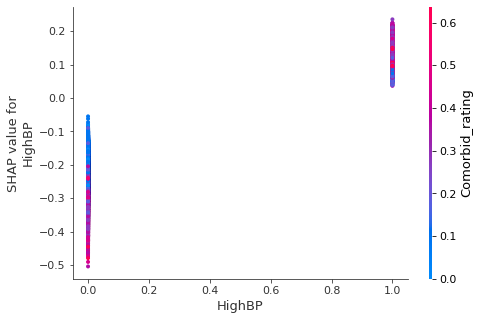

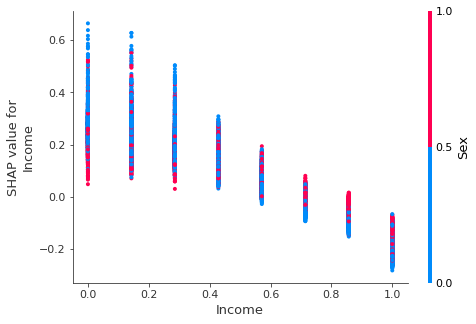

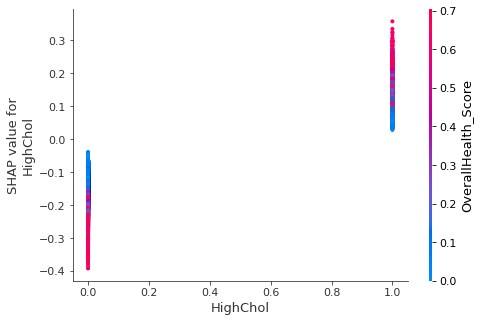

In [71]:
# Use SHAP dependence plots to explore interactions between **moderate  importance** features
moderate_features = ['HighBP', 'Income', 'HighChol']  

for feature in moderate_features:
    shap.dependence_plot(feature, shap_values, X_test_scaled, display_features=X_test_scaled)
    plt.show()


# Moderate Importance 
**HighBP**
- HighBP increases predictions, indicating its role as a risk factor for diabetes while the absennce of HighBp decreases predictions, showing it as a protective factor.
- The impact of HighBP is moderated by interactions with other features such as comorbid features
**Income**
- At higher incomes diabetic status predictions are lower and income serves as a protection factor. However lower income increases predictions and serves as a  risk factors for diabetes,
- At lower income levels the variability in SHAP values suggests that income interacts with another features  such as OverallHealth_Score amplifing the effect of low income on predictions.
**HighChol**
- The presence of high cholesterol Increases the likelihood of diabetes, contributing positively to predictions while the absence of HighChol reduces the likelihood of diabetes, contributing negatively to predictions.
- The effect of high cholesterol is moderated or amplified by another features. 

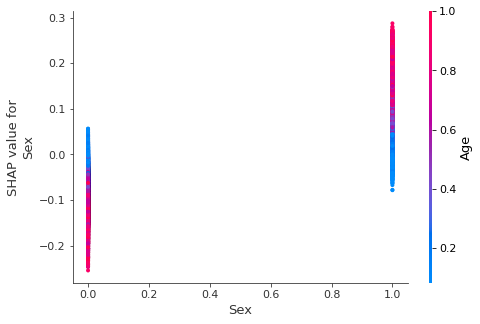

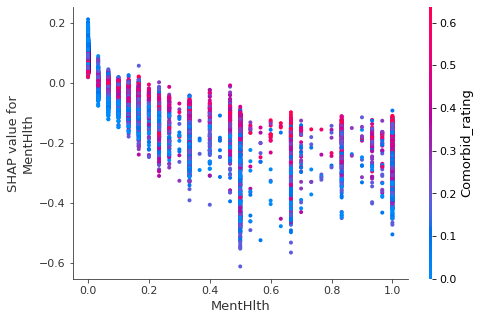

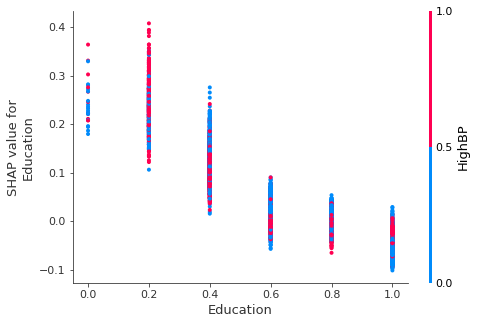

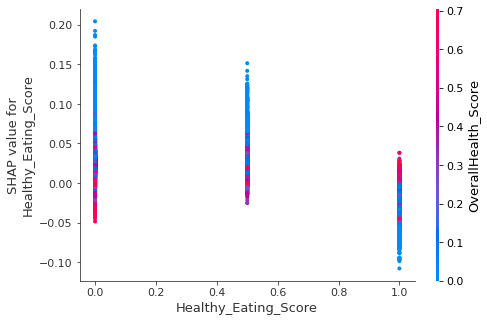

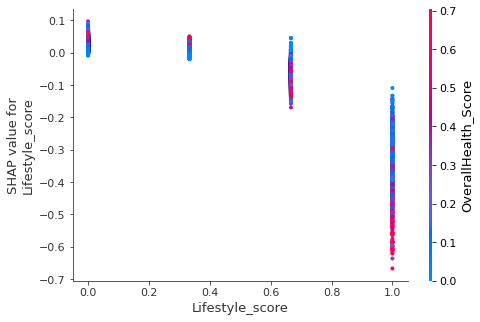

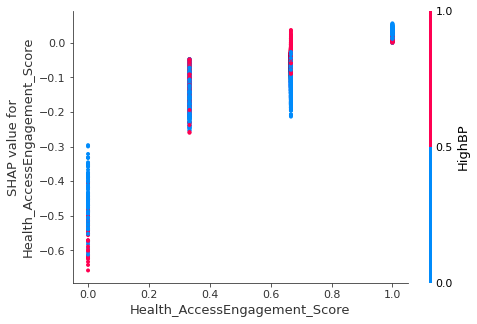

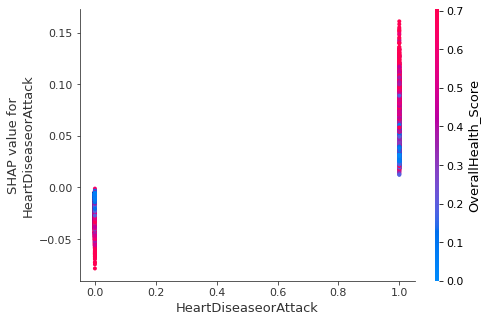

In [72]:
# Use SHAP dependence plots to explore interactions between **low  importance** features
low_features = ['Sex', 'MentHlth', 'Education','Healthy_Eating_Score','Lifestyle_score','Health_AccessEngagement_Score', 'HeartDiseaseorAttack']  

for feature in low_features:
    shap.dependence_plot(feature, shap_values, X_test_scaled, display_features=X_test_scaled)
    plt.show()

# Low importance Features 
**SeX**
- For females SHAP values are negative or closer to zero, indicating that being female decreases model's predicted risk.
- For males, SHAP values are positive, indicating that being male increases the predicted risk.
- Feature Interaction: The presence of both blue and pink points indicates a secondary feature has minimal modulation on the influence of Sex.

**MentHlth**
- As MentHlth increases (worse mental health), SHAP values become more negative, reduced risk for predictions.
- Interaction:Blue  dominates at lower MentHlth values while Pink appears more often at higher MentHlth values, and maybe amplifying the effect.

**Education**
- Lower Education levels correspond to higher positive SHAP values, and contributes to increased risk.
- Higher Education levels reduces SHAP values, suggesting a protective effect.
- Interaction:Blue dominates at higher Education levels, reinforcing the protective effect while Pink is more visible at lower Education levels, indicating  a stronger negative impact when education is low and the interacting feature is high.

**Healthy_Eating_Score**
- Lower Healthy_Eating_Score (SHAP values are higher) indicates poor eating habits suggesting poor eating habits increase risk.
- Higher Healthy_Eating_Score (lower SHAP values)indicating a reduced risk.
- Interaction: Blue points dominate at score = 1, reinforcing its protective nature while Pink is more evident at lower scores, amplifying the negative impact of unhealthy eating.

**Lifestyle_score**
- Higher Lifestyle_score (indicating a more detrimental lifestyle) corresponds to more negative SHAP values, indicating an increased negative effect on the prediction.
- Interaction:Blue points dominate at lower Lifestyle_score levels, suggesting a weaker influence.However, pink points become prominent at higher scores, suggesting  increase impact when combined with high values of the interacting feature.

**Health_AccessEngagement_Score**
- Lower scores means poor access/engagement with healthcare and correspond to more negative SHAP values,and increased contribution to risk.
- Higher scores have minimal SHAP contributions, suggesting better healthcare access is less predictive.
 - Interaction:Blue dominates at higher scores,  less predictive .Pink becomes more evident at lower scores, amplifying the feature's negative impact. 



#  Key Findings from SHAP Analysis

## **Feature Importance Order**
- High Importance: Comorbid_rating, OverallHealth_Score, and BMI are the top contributors to predictions.
- Moderate Importance: HighBP and Income have variable effects based on feature values.
- Lower Importance: Lifestyle_score, Health_AccessEngagement_Score, and HeartDiseaseorAttack contribute less.

## **High Importance Features**

Comorbid_rating
- High values increase risk (positive SHAP values), while low values reduce risk (negative SHAP values).
- Interactions: High Comorbid_rating with high-risk features amplifies risk (pink). Low-risk features (blue) offset severity.

OverallHealth_Score
- High scores indicate worse health and increase risk, while low scores reduce risk.
- Interactions: High comorbid values (pink) increase risk. Low comorbid values (blue) mitigate risk.

BMI
- High BMI increases predictions, while low BMI reduces risk.
- Interactions: Non-linear; risk increases up to a threshold and declines. High BMI with high glucose amplifies risk (pink), while low BMI with low glucose reduces risk (blue).

## **Moderate Importance Features**

HighBP
- Presence increases risk, absence reduces it.
- Interactions: Risk is moderated by comorbid features.

Income
- Higher income reduces risk, while lower income increases it.
- Interactions: Low income amplifies risk when combined with poor health.

HighChol
- Presence increases risk; absence reduces it.

### **Lower Importance Features**

Sex
- Females have reduced risk (negative SHAP values). Males have increased risk (positive SHAP values).

MentHlth
- Poor mental health reduces risk (negative SHAP values).Interactions: Higher mental health issues amplify effects.

Education
- Lower education increases risk: higher education reduces it. 
- Interactions: Low education with high-risk features amplifies risk .

Healthy_Eating_Score
- Poor eating habits increase risk; healthy eating reduces risk.
- Interactions: Poor eating habits amplify risk, while healthy habits are protective .

Lifestyle_score
- Poor lifestyles increase risk; better lifestyles reduce it.
- Interactions: Poor lifestyle combined with high-risk features  amplifies risk.

Health_AccessEngagement_Score
- Poor healthcare access increases risk: better access has minimal impact.
- Interactions: Poor access with high-risk features (pink) amplifies risk.





## Recommended Interventions

Based on the above analysis the following predictive recommendations are proposed:

1.	Target High-Risk Groups: Focus on individuals with high Comorbid_rating, poor health, low income, and unhealthy lifestyles.
2.	Leverage Protective Factors: Promote healthy eating, higher education, better healthcare access, and income growth.
3.	Address Interactions: Target scenarios where multiple high-risk features compound effects to implement tailored interventions.

# Next Steps 

1.	Validate Findings:
- Conduct robustness checks by applying SHAP analysis to new datasets to ensure the consistency of insights.
- Compare the SHAP feature importance rankings with other feature importance metrics like permutation importance
- Perform subgroup analysis to examine feature contributions across different demographic groups.

2.	Feature Engineering:
- Explore additional composite variables to capture nuanced relationships.
- Investigate temporal patterns in the CDC health data.

3.	Enhance Model Interpretability:
- To confirm key drivers, compare SHAP results across different models (e.g., Random Forest, Gradient Boosting) 
- Simplify models by pruning low-importance features identified in SHAP analysis.

4.	Cluster-Based Analysis:
- To identify distinct risk profiles group individuals based on feature similarity (e.g., clustering by OverallHealth_Score and Lifestyle_score) . 
- Tailor interventions and predictive models for each cluster.
